<a href="https://colab.research.google.com/github/napol-boonthong-660510539/Statistical-Learning-Labs/blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_229351_LAB10_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 8 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

1. ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้
2. Save file ใน Github
3. ส่ง Github link ใน Canvas

ดาวน์โหลดข้อมูลการขายรถยนต์ใน link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/CarSales.csv  

In [1]:
!wget -O CarSales.csv https://donlapark.pages.dev/229351/data/CarSales.csv

--2025-09-21 15:12:43--  https://donlapark.pages.dev/229351/data/CarSales.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1834 (1.8K) [text/csv]
Saving to: ‘CarSales.csv’

CarSales.csv        100%[===================>]   1.79K  --.-KB/s    in 0s      

2025-09-21 15:12:44 (24.5 MB/s) - ‘CarSales.csv’ saved [1834/1834]



In [2]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
# ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
def parser(dates):
  return datetime.strptime(dates, '%Y-%m')

# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('CarSales.csv', parse_dates=['Month'],
                                        index_col='Month',
                                        date_parser=parser)

print (data.tail())

            Sales
Month            
1968-08-01  16722
1968-09-01  14385
1968-10-01  21342
1968-11-01  17180
1968-12-01  14577


/tmp/ipython-input-1991569042.py:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('CarSales.csv', parse_dates=['Month'],


### Check if the inferred frequency is correct

[list of time series frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

In [4]:
print(data.index.inferred_freq)

MS


In [5]:
y = data['Sales'].astype('float32')

print(y)

Month
1960-01-01     6550.0
1960-02-01     8728.0
1960-03-01    12026.0
1960-04-01    14395.0
1960-05-01    14587.0
               ...   
1968-08-01    16722.0
1968-09-01    14385.0
1968-10-01    21342.0
1968-11-01    17180.0
1968-12-01    14577.0
Name: Sales, Length: 108, dtype: float32


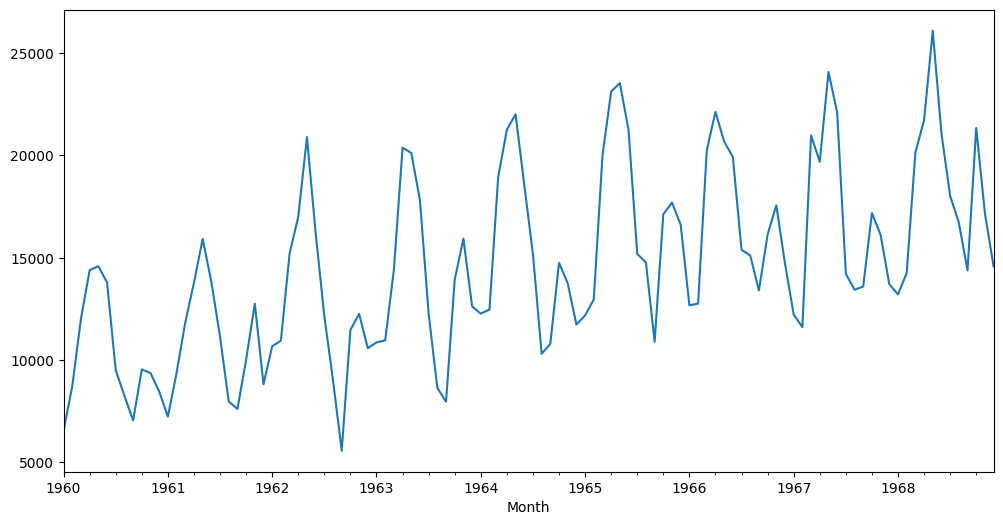

In [6]:
plt.figure(figsize=(12,6))
y.plot();

In [7]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

# Train-Test split

In [8]:
train = y[:-12]
test = y[-12:]

print(test)

Month
1968-01-01    13210.0
1968-02-01    14251.0
1968-03-01    20139.0
1968-04-01    21725.0
1968-05-01    26099.0
1968-06-01    21084.0
1968-07-01    18024.0
1968-08-01    16722.0
1968-09-01    14385.0
1968-10-01    21342.0
1968-11-01    17180.0
1968-12-01    14577.0
Name: Sales, dtype: float32


## Holt Winter’s Exponential Smoothing

`ExponentialSmoothing`

### trend : {“add”, “mul”, “additive”, “multiplicative”, None}, optional

    Type of trend component.

### damped : bool, optional

    Should the trend component be damped.

### seasonal : {“add”, “mul”, None}, optional

    Type of seasonal component.

### seasonal_periods : int, optional

    The number of periods in a complete seasonal cycle, e.g., 4 for quarterly data or 7 for daily data with a weekly cycle.


In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

es = ExponentialSmoothing(train, trend = 'add', damped=True, seasonal=None, seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat = es_fit.predict('1968-01-01', '1968-12-01')

/tmp/ipython-input-3387144215.py:3: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(train, trend = 'add', damped=True, seasonal=None, seasonal_periods=12)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [10]:
print('RMSE:',rmse(test,yhat))

RMSE: 5865.373800572302


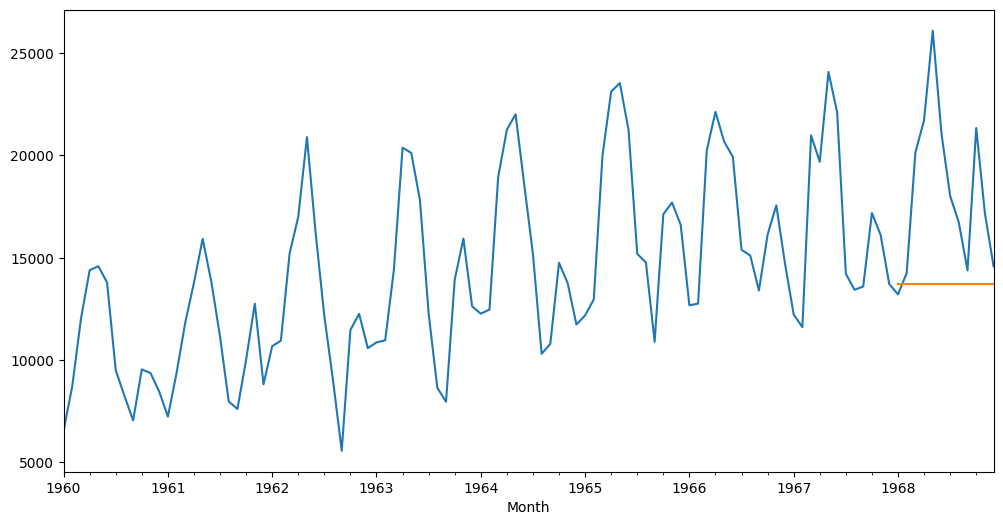

In [11]:
plt.figure(figsize=(12,6))
y.plot()
yhat.plot();

In [12]:
es = ExponentialSmoothing(train, trend = 'add', damped=True, seasonal='mul', seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat = es_fit.predict('1968-01-01', '1968-12-01')

print('RMSE:',rmse(test,yhat))

/tmp/ipython-input-566070956.py:1: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(train, trend = 'add', damped=True, seasonal='mul', seasonal_periods=12)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RMSE: 2010.1917502656017


RMSE: 2010.1917502656017


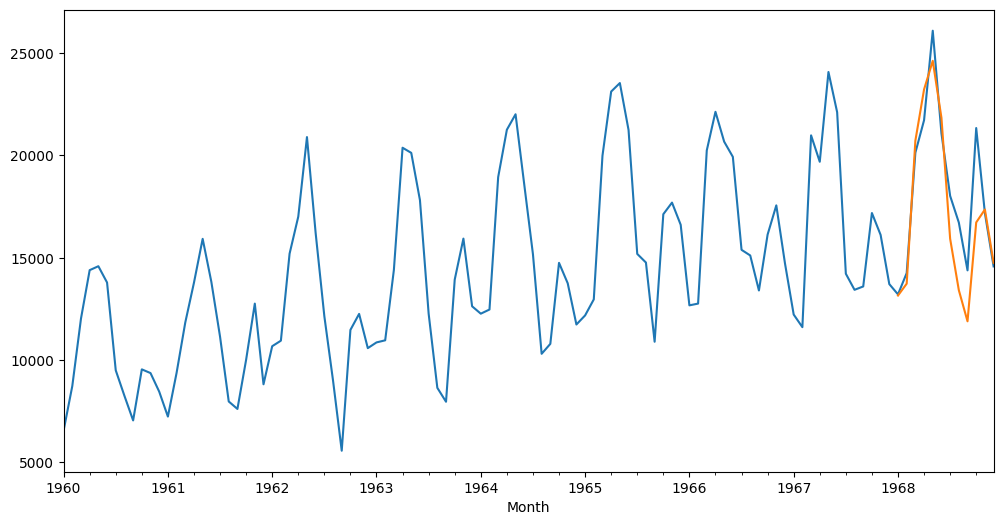

In [13]:
print('RMSE:',rmse(test,yhat))

plt.figure(figsize=(12,6))
y.plot()
yhat.plot();

Check the parameters of the model.

In [14]:
#list of parameters
es_fit.params

{'smoothing_level': np.float64(0.2746630683954485),
 'smoothing_trend': np.float64(0.0),
 'smoothing_seasonal': np.float64(0.0),
 'damping_trend': np.float64(0.9844452223365033),
 'initial_level': np.float64(10164.815804819955),
 'initial_trend': np.float64(186.9166244108357),
 'initial_seasons': array([0.71583102, 0.74572693, 1.1230201 , 1.25599891, 1.32887223,
        1.17619146, 0.8560773 , 0.7195901 , 0.63668732, 0.893797  ,
        0.92580739, 0.78516455]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}